In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | bellevue
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | husavik
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | shelopugino
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | faanui
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | iskateley
Processing Record 14 of Set 1 | nanchang
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | butaritari
Processing Record 17 of Set 1 | adrar
Processing Record 18 of Set 1 | port blair
Processing Record 19 of Set 1 | sanchor
Processing Record 20 of Set 1 | karauzyak
City not found. Skipping...
Processing Record 21 of Set 1 | kathu
Processing Record 22 of Set 1 | mahebourg

Processing Record 38 of Set 4 | demak
Processing Record 39 of Set 4 | sinjar
Processing Record 40 of Set 4 | namatanai
Processing Record 41 of Set 4 | brae
Processing Record 42 of Set 4 | gorontalo
Processing Record 43 of Set 4 | coari
Processing Record 44 of Set 4 | avera
Processing Record 45 of Set 4 | jiujiang
Processing Record 46 of Set 4 | namibe
Processing Record 47 of Set 4 | kolda
Processing Record 48 of Set 4 | korla
Processing Record 49 of Set 4 | kizukuri
Processing Record 50 of Set 4 | farah
Processing Record 1 of Set 5 | ozernovskiy
Processing Record 2 of Set 5 | chemal
Processing Record 3 of Set 5 | iqaluit
Processing Record 4 of Set 5 | shizunai
Processing Record 5 of Set 5 | sakakah
Processing Record 6 of Set 5 | umm lajj
Processing Record 7 of Set 5 | khani
Processing Record 8 of Set 5 | marawi
Processing Record 9 of Set 5 | araouane
Processing Record 10 of Set 5 | gornopravdinsk
Processing Record 11 of Set 5 | lac du bonnet
Processing Record 12 of Set 5 | iranshahr
Pr

Processing Record 28 of Set 8 | lorengau
Processing Record 29 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 30 of Set 8 | san patricio
Processing Record 31 of Set 8 | iida
Processing Record 32 of Set 8 | labuhan
Processing Record 33 of Set 8 | muchkapskiy
Processing Record 34 of Set 8 | east wenatchee bench
Processing Record 35 of Set 8 | leningradskiy
Processing Record 36 of Set 8 | zhangye
Processing Record 37 of Set 8 | zhigalovo
Processing Record 38 of Set 8 | varel
Processing Record 39 of Set 8 | qinhuangdao
Processing Record 40 of Set 8 | chau doc
Processing Record 41 of Set 8 | englewood
Processing Record 42 of Set 8 | tarudant
City not found. Skipping...
Processing Record 43 of Set 8 | zheleznodorozhnyy
Processing Record 44 of Set 8 | halifax
Processing Record 45 of Set 8 | airai
Processing Record 46 of Set 8 | fortuna
Processing Record 47 of Set 8 | cayenne
Processing Record 48 of Set 8 | olafsvik
Processing Record 49 of Set 8 | bonnyville
Processing Record

Processing Record 17 of Set 12 | tshela
Processing Record 18 of Set 12 | vestmannaeyjar
Processing Record 19 of Set 12 | karratha
Processing Record 20 of Set 12 | christchurch
Processing Record 21 of Set 12 | okha
Processing Record 22 of Set 12 | nsoko
Processing Record 23 of Set 12 | karmala
Processing Record 24 of Set 12 | sao felix do xingu
Processing Record 25 of Set 12 | daloa
Processing Record 26 of Set 12 | sri aman
Processing Record 27 of Set 12 | deputatskiy
Processing Record 28 of Set 12 | tazovskiy
Processing Record 29 of Set 12 | pechenga
Processing Record 30 of Set 12 | saiha
Processing Record 31 of Set 12 | alcudia
Processing Record 32 of Set 12 | nuevo casas grandes
Processing Record 33 of Set 12 | poum
Processing Record 34 of Set 12 | tiarei
Processing Record 35 of Set 12 | tromso
Processing Record 36 of Set 12 | khon buri
Processing Record 37 of Set 12 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 12 | cabedelo
Processing Record 39 of Set 12 |

In [15]:
len(city_data)

581

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,45.93,63,23,7.20,RU,2021-07-25 20:19:52
1,Bellevue,47.6104,-122.2007,86.18,50,1,5.01,US,2021-07-25 20:22:15
2,Barrow,71.2906,-156.7887,44.62,92,90,12.66,US,2021-07-25 20:23:29
3,Kapaa,22.0752,-159.3190,82.72,79,75,1.99,US,2021-07-25 20:21:51
4,Husavik,66.0449,-17.3389,60.71,64,100,6.26,IS,2021-07-25 20:23:29
5,Ushuaia,-54.8000,-68.3000,37.06,75,40,20.71,AR,2021-07-25 20:23:29
6,Shelopugino,51.6514,117.5599,55.67,98,98,2.89,RU,2021-07-25 20:23:30
7,Tiksi,71.6872,128.8694,48.25,81,100,6.38,RU,2021-07-25 20:23:30
8,Faanui,-16.4833,-151.7500,78.01,66,0,12.86,PF,2021-07-25 20:22:48
9,Tuktoyaktuk,69.4541,-133.0374,48.20,93,90,17.27,CA,2021-07-25 20:21:25


In [20]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [21]:

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-07-25 20:19:52,68.7500,161.3000,45.93,63,23,7.20
1,Bellevue,US,2021-07-25 20:22:15,47.6104,-122.2007,86.18,50,1,5.01
2,Barrow,US,2021-07-25 20:23:29,71.2906,-156.7887,44.62,92,90,12.66
3,Kapaa,US,2021-07-25 20:21:51,22.0752,-159.3190,82.72,79,75,1.99
4,Husavik,IS,2021-07-25 20:23:29,66.0449,-17.3389,60.71,64,100,6.26
5,Ushuaia,AR,2021-07-25 20:23:29,-54.8000,-68.3000,37.06,75,40,20.71
6,Shelopugino,RU,2021-07-25 20:23:30,51.6514,117.5599,55.67,98,98,2.89
7,Tiksi,RU,2021-07-25 20:23:30,71.6872,128.8694,48.25,81,100,6.38
8,Faanui,PF,2021-07-25 20:22:48,-16.4833,-151.7500,78.01,66,0,12.86
9,Tuktoyaktuk,CA,2021-07-25 20:21:25,69.4541,-133.0374,48.20,93,90,17.27


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

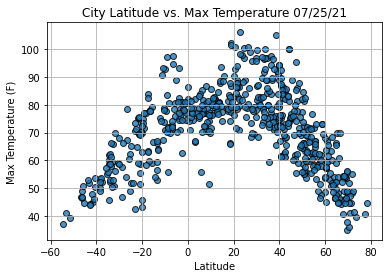

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

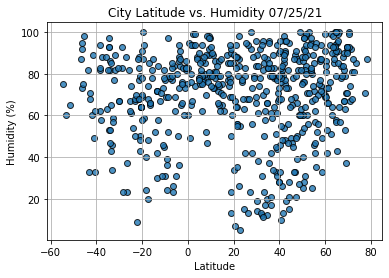

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

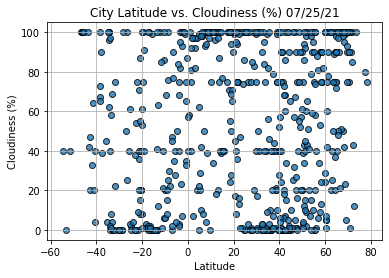

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

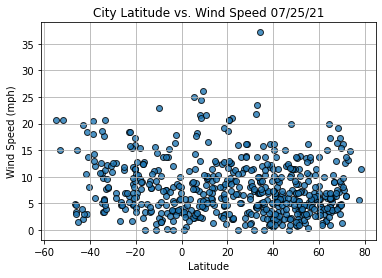

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()